### Final Project
##### Submitted by: Group 3
##### Course Name: Capstone Project

### Load Packages

In [1]:
#Basics
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#SkLearn ML General
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


#SkLearn ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Load Data

In [2]:
#Load Dataset
file_path = './data.xlsx'
df = pd.read_excel(file_path)

### View and Assess Data 

In [3]:
df.head()

,Age of Involved party,Collision Location,Accident Class,Accident Number,Date,District,DIVISION,Driver Action,Driver Condition,Index,...,Street 1,Street 2,Time,Time_Category,Traffic Control Type,Vehicle Type,Vehicle Manoeuver,Visibility,Ward Number,Year
0,0 to 4,At Intersection,1.0,982207.0,2007-07-18,Scarborough,D41,unknown,Unknown,1006.0,...,LAWRENCE AVE E,WARDEN AVE,16:07:00,Day,Traffic Signal,Other,unknown,Clear,21.0,2007.0
1,0 to 4,At Intersection,1.0,1047910.0,2008-07-14,Toronto and East York,D55,unknown,Unknown,1275.0,...,DANFORTH AVE,COXWELL AVE,13:37:00,Day,Traffic Signal,Other,unknown,Clear,1419.0,2008.0
2,0 to 4,At Intersection,1.0,1047910.0,2008-07-14,Toronto and East York,D55,unknown,Unknown,1280.0,...,DANFORTH AVE,COXWELL AVE,13:37:00,Day,Traffic Signal,Other,unknown,Clear,1419.0,2008.0
3,0 to 4,At Intersection,1.0,1147341.0,2010-01-12,Etobicoke York,D22,unknown,Unknown,2243.0,...,MARTIN GROVE RD,EGLINTON AVE W,12:40:00,Day,Traffic Signal,Other,unknown,Clear,12.0,2010.0
4,0 to 4,At Intersection,1.0,1255565.0,2011-09-23,Etobicoke York,D23,unknown,Unknown,2894.0,...,MARTIN GROVE Road,DIXON Road,19:12:00,Night,Traffic Signal,Other,Other,Rain,12.0,2011.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Age of Involved party   3813 non-null   object        
 1   Collision Location      3811 non-null   object        
 2   Accident Class          3811 non-null   float64       
 3   Accident Number         3811 non-null   float64       
 4   Date                    3811 non-null   datetime64[ns]
 5   District                3811 non-null   object        
 6   DIVISION                3811 non-null   object        
 7   Driver Action           3811 non-null   object        
 8   Driver Condition        3811 non-null   object        
 9   Index                   3811 non-null   float64       
 10  Initial Impact Type     3811 non-null   object        
 11  Injury Severity         3811 non-null   object        
 12  Involvement Type        3811 non-null   object  

In [5]:
## replace nan with unknown, remove total column, create new column with age group 
df['Age of Involved party'].unique()

array(['0 to 4', '10 to 14', '15 to 19', '20 to 24', '25 to 29',
       '30 to 34', '35 to 39', '40 to 44', '45 to 49', '5 to 9',
       '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74',
       '75 to 79', '80 to 84', '85 to 89', '90 to 94', 'Over 95',
       'unknown', 'Total', nan,
       'Applied filters:\nYear is 2006, 2007, 2008, 2009, 2010, 2011, 2012, or 2013'],
      dtype=object)

In [6]:
df = df[df['Age of Involved party'] != 'Total']

In [7]:
df = df.fillna('unknown')

In [8]:
# Create a function to map age ranges to groups
def categorize_age(age_range):
    if '0 to 4' in age_range or '5 to 9' in age_range:
        return 'Underage'
    elif any(str(i) in age_range for i in range(10, 20)):
        return 'Young'
    elif any(str(i) in age_range for i in range(20, 50)):
        return 'Adult'
    else:
        return 'Old'

# Apply the function to create a new column 'Age_Group'
df['Age Group'] = df['Age of Involved party'].apply(categorize_age)

In [9]:
 df['Driver Condition'].unique()

array(['Unknown', 'Normal', 'Had Been Drinking', 'Inattentive',
       'Ability Impaired, Alcohol', 'Ability Impaired, Alcohol Over .08',
       'Fatigue', 'Other', 'Medical or Physical Disability',
       'Ability Impaired, Drugs', 'unknown'], dtype=object)

In [10]:
## replace nan with unknown.
df = df.fillna('Unknown')

In [11]:
df['Injury Severity'].unique()

array(['Minor', 'None', 'Major', 'Minimal', 'Fatal', 'unknown'],
      dtype=object)

In [12]:
#remove accident class column, remove index column, remove 'unknown ijury severity' rows, replace minimal with minor
df = df.drop(columns = ['Street 1','Street 2','Accident Class', 'Index', 'Accident Number', 'Latitude', 'Location Coordinate', 'Longitude', 'Ward Number','NEIGHBOURHOOD_158', ], axis = 1)
df = df[df['Injury Severity'] != 'unknown']
df['Injury Severity'] = df['Injury Severity'].replace('Minimal', 'Minor')

In [13]:
df['Light Condition'].unique()

array(['Daylight', 'Dark', 'Dark, artificial', 'Dusk', 'Dusk, artificial',
       'Dawn, artificial', 'Dawn', 'Daylight, artificial'], dtype=object)

In [14]:
#replace all artificial with original
df['Light Condition'] = df['Light Condition'].replace('Daylight, artificial', 'Daylight')
df['Light Condition'] = df['Light Condition'].replace('Dark, artificial', 'Dark')
df['Light Condition'] = df['Light Condition'].replace('Dawn, artificial', 'Dawn')
df['Light Condition'] = df['Light Condition'].replace('Dusk, artificial', 'Dusk')

In [15]:
df['Time_Category'].unique()

array(['Day', 'Night', 'Morning', 'Early Morning', 'Invalid Time'],
      dtype=object)

In [16]:
##replace Invalid Time with Evening 
df['Time_Category'] = df['Time_Category'].replace('Invalid Time', 'Evening')

In [17]:
df['Vehicle Type'].unique()

array(['Other', 'Bicycle', 'Automobile, Station Wagon', 'Motorcycle',
       'Truck - Open', 'Pick Up Truck', 'Taxi', 'Moped',
       'Municipal Transit Bus (TTC)', 'Passenger Van', 'Delivery Van',
       'Truck-Tractor', 'Construction Equipment',
       'Truck - Closed (Blazer, etc)'], dtype=object)

In [18]:
df['Vehicle Type'] = df['Vehicle Type'].replace('Truck - Open', 'Open Body Truck')
df['Vehicle Type'] = df['Vehicle Type'].replace('Truck - Closed (Blazer, etc)', 'Closed Body Truck')

In [19]:
df.shape
print("Number of Rows:", df.shape[0],
     "\n"
     "Number of Columns:", df.shape[1])

Number of Rows: 3811 
Number of Columns: 21


There are 3811 observations and 24 variables in this dataset

Next, we will convert the Time variable to DateTime and Accident Class to integer

In [20]:
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3811 entries, 0 to 3810
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age of Involved party   3811 non-null   object
 1   Collision Location      3811 non-null   object
 2   Date                    3811 non-null   object
 3   District                3811 non-null   object
 4   DIVISION                3811 non-null   object
 5   Driver Action           3811 non-null   object
 6   Driver Condition        3811 non-null   object
 7   Initial Impact Type     3811 non-null   object
 8   Injury Severity         3811 non-null   object
 9   Involvement Type        3811 non-null   object
 10  Light Condition         3811 non-null   object
 11  Road Class              3811 non-null   object
 12  Road Surface Condition  3811 non-null   object
 13  Time                    3811 non-null   object
 14  Time_Category           3811 non-null   object
 15  Traf

In [22]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Year'] = df['Year'].astype(int)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [23]:
df.isnull().sum()

Age of Involved party     0
Collision Location        0
Date                      0
District                  0
DIVISION                  0
Driver Action             0
Driver Condition          0
Initial Impact Type       0
Injury Severity           0
Involvement Type          0
Light Condition           0
Road Class                0
Road Surface Condition    0
Time                      0
Time_Category             0
Traffic Control Type      0
Vehicle Type              0
Vehicle Manoeuver         0
Visibility                0
Year                      0
Age Group                 0
Month                     0
dtype: int64

We don't have null values in the dataset.

In [24]:
df.select_dtypes(include= 'object').nunique()

Age of Involved party     21
Collision Location         3
District                   4
DIVISION                  17
Driver Action             14
Driver Condition          10
Initial Impact Type       10
Injury Severity            4
Involvement Type          14
Light Condition            4
Road Class                 4
Road Surface Condition     8
Time_Category              5
Traffic Control Type       8
Vehicle Type              14
Vehicle Manoeuver         16
Visibility                 8
Age Group                  4
dtype: int64

In [25]:
df.to_excel('output.xlsx', index=False)

### Exploratory Data Analysis

Let us look at the Target variable.

In [26]:
def cat_var (data, variable, title):
    sns.countplot(data=df, x= variable)
    plt.title(title)
    plt.show()

    # Display value counts
    value_counts = data[variable].value_counts(normalize = True)
    print(value_counts)

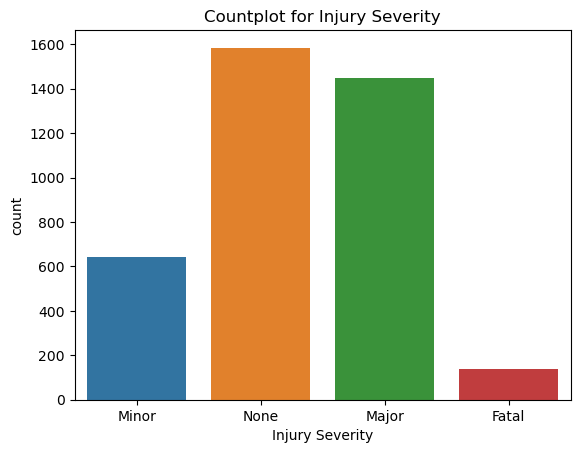

None     0.415639
Major    0.379428
Minor    0.168460
Fatal    0.036473
Name: Injury Severity, dtype: float64


In [27]:
cat_var(df, 'Injury Severity', 'Countplot for Injury Severity')

Surprisingly, the hightest % are for persons who are involved in accidents leave without a scratch. Mojor accidents account for **38%**, while Minor and Fatal accidents are ~**17%**, and ~**0.04%**.  

In [28]:
def cat_var_hue(data, variable, hue=None, title=None):
    sns.countplot(data = df, x = variable, hue = hue)
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='District', fontsize='small') 
    plt.show()

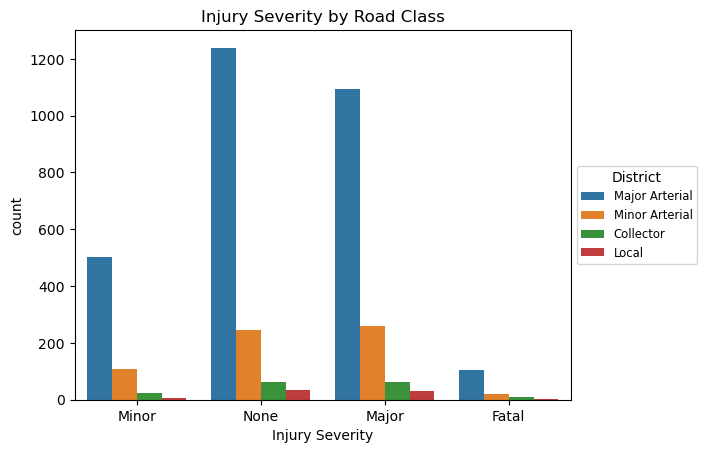

In [29]:
cat_var_hue(df,'Injury Severity', hue = 'Road Class', title='Injury Severity by Road Class')

In [30]:
df.groupby('Road Class')['Injury Severity'].value_counts()

Road Class      Injury Severity
Collector       None                 64
                Major                63
                Minor                25
                Fatal                11
Local           None                 34
                Major                29
                Minor                 5
                Fatal                 4
Major Arterial  None               1239
                Major              1095
                Minor               503
                Fatal               104
Minor Arterial  Major               259
                None                247
                Minor               109
                Fatal                20
Name: Injury Severity, dtype: int64

Majority of Accidents occured along Major Arterial roads. Local roads had the lowest occurence of accidents. 

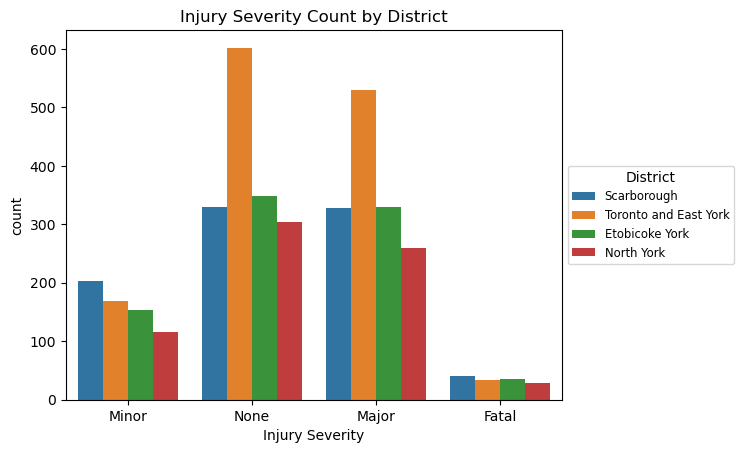

In [31]:
cat_var_hue(df,'Injury Severity', hue = 'District', title='Injury Severity Count by District')

In [32]:
df.groupby('District')['Injury Severity'].value_counts(normalize = True)

District               Injury Severity
Etobicoke York         None               0.402074
                       Major              0.379032
                       Minor              0.177419
                       Fatal              0.041475
North York             None               0.429986
                       Major              0.366337
                       Minor              0.164074
                       Fatal              0.039604
Scarborough            None               0.365150
                       Major              0.364040
                       Minor              0.225305
                       Fatal              0.045505
Toronto and East York  None               0.450936
                       Major              0.397004
                       Minor              0.126592
                       Fatal              0.025468
Name: Injury Severity, dtype: float64

Overall, Majority of the accidents occured along Toronto & East York district. The Insights from here tells us that most of the fatal accidents occured in Scarbrough district & Etobicoke York. 

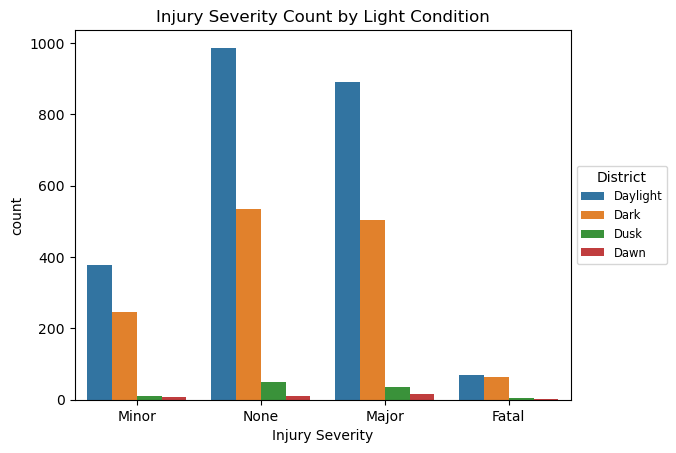

In [33]:
cat_var_hue(df,'Injury Severity', hue = 'Light Condition', title='Injury Severity Count by Light Condition')

Majority of the accidents occured during the day time,followed by dark conditions. 

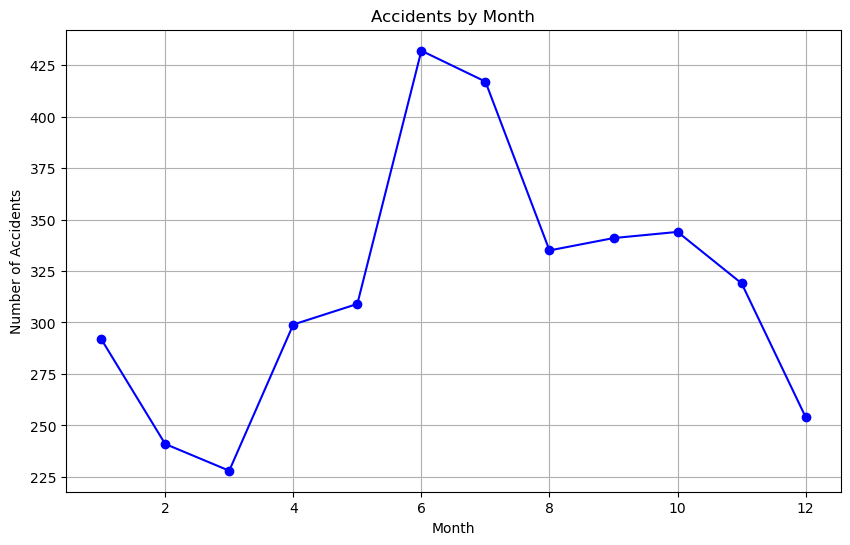

In [34]:
# Grouping by month and counting accidents
accidents_by_month = df.groupby('Month').size()

# Plotting the time series (line graph)
plt.figure(figsize=(10, 6))
accidents_by_month.plot(kind='line', marker='o', color='blue')

# Adding labels and title
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

We can see that most accidents occured in June, followed by July. Lowest accident occured in February and March. 

In [35]:
df = df.drop(columns = ['Date','Time'], axis = 1)

In [36]:
#Create Profile Report

#Importing package
import ydata_profiling as pp
from IPython.display import IFrame

dfReport = pp.ProfileReport(df)
dfReport.to_file('dfReport.html')
display(IFrame('dfReport.html', width=900, height=350))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
# Assuming 'df' is your DataFrame with 5 columns and a target variable 'severity'
columns_to_encode = df.columns[df.columns != 'Injury Severity']  # Selecting columns to encode

# Creating a DataFrame without the target variable
data_to_encode = df[columns_to_encode]

# One-hot encoding categorical columns
encoded_data = pd.get_dummies(data_to_encode)

# Combining the one-hot encoded columns with the target variable
df_ohe = pd.concat([encoded_data, df['Injury Severity']], axis=1)

In [38]:
#Define x and y variable
x = df_ohe.drop(['Injury Severity'],axis=1).to_numpy()
y = df_ohe['Injury Severity'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_smt)
x_test_scaled = sc.transform(x_test)

In [39]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [40]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_zeros = (y_train_smt == 0).sum()
num_ones = (y_train_smt == 1).sum()
print('Class 0 -',  num_zeros)
print('Class 1 -',  num_ones)

Train Data - Class Split
Class 0 - 0
Class 1 - 0


In [41]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=100))])
pipeline.insert(0,pipe_rdf)

pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(random_state=100))])
pipeline.insert(1,pipe_dt)

pipe_lda = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearDiscriminantAnalysis())])
pipeline.insert(0,pipe_lda)

pipe_qda = Pipeline([('scl', StandardScaler()),
                    ('clf', QuadraticDiscriminantAnalysis())])
pipeline.insert(1,pipe_qda)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))])   
pipeline.insert(2,pipe_logreg)

# Set grid search params 

modelpara =[]

param_gridrdf = {
            'clf__criterion':['gini','entropy'],
            'clf__n_estimators': [100,150,200],
            'clf__bootstrap': [True, False]}
modelpara.insert(0,param_gridrdf)

max_depth = range(1,100)
param_griddt = {'clf__criterion':['gini','entropy'],
                'clf__max_depth':max_depth}
modelpara.insert(1,param_griddt)

param_gridlda = {'clf__solver':['svd','lsqr','eigen']}
modelpara.insert(0,param_gridlda)

param_gridqda = {}
modelpara.insert(1,param_gridqda)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(2,param_gridlogreg)

In [42]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.01])
    plt.show()

Decision Tree - Learning Curve


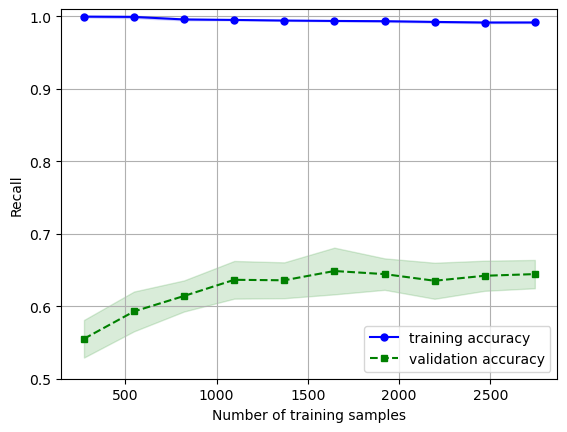


Random Forest - Learning Curve


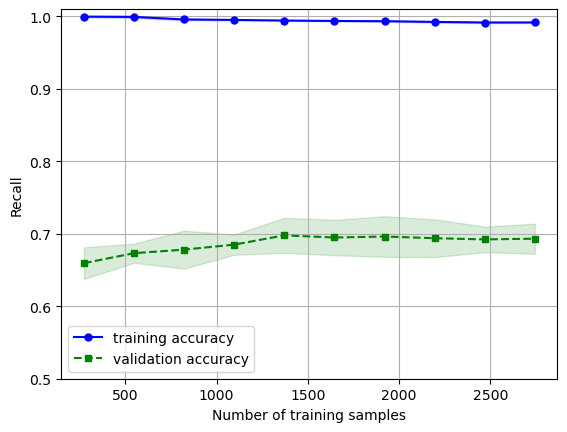

LDA Learning Curve


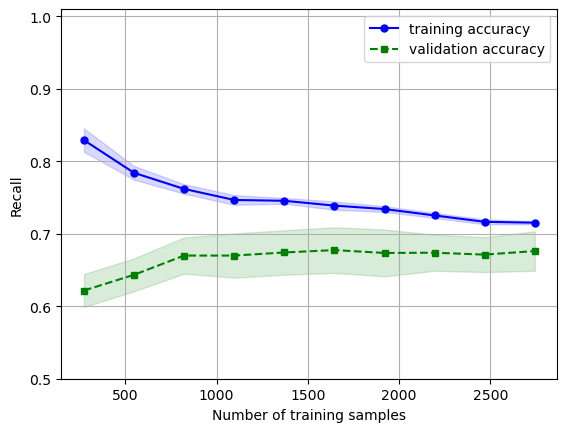


 QDA Learning Curve


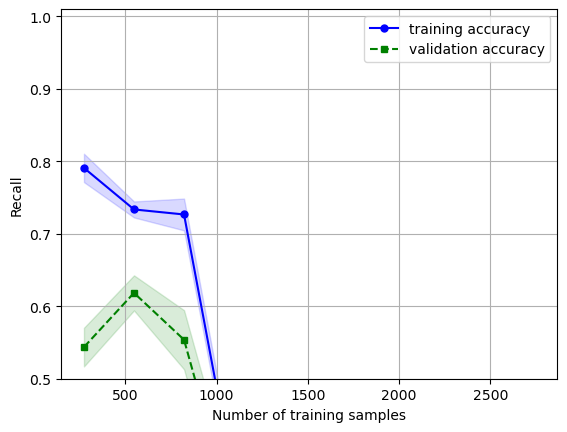


 Logistic Regression Learning Curve


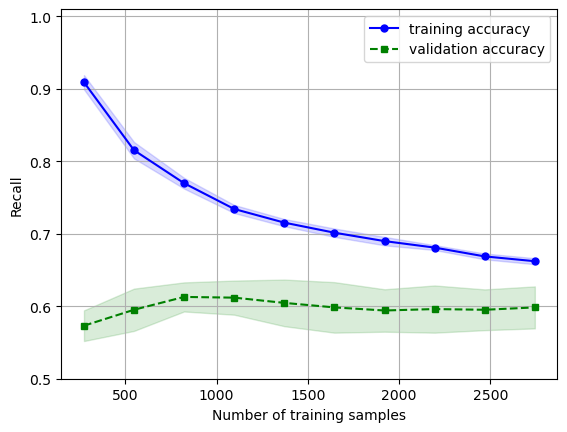

In [43]:
#Plot Learning Curve
print('Decision Tree - Learning Curve')
plot_learning_curves(pipe_dt)
print('\nRandom Forest - Learning Curve')
plot_learning_curves(pipe_rdf)
print('LDA Learning Curve')
plot_learning_curves(pipe_lda)
print('\n QDA Learning Curve')
plot_learning_curves(pipe_qda)
print('\n Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)

The learning curve tells us that all 5 models are overfitting. To address this issue, we will optimize the models by tuning some hyperparameters. Result for QDA does not seem very clear. 

Model Evaluation - Recall Score
LDA 0.75 +/- 0.02
QDA 0.43 +/- 0.03
Log Reg 0.77 +/- 0.02
Decision Tree 0.75 +/- 0.02
Random Forest 0.81 +/- 0.02




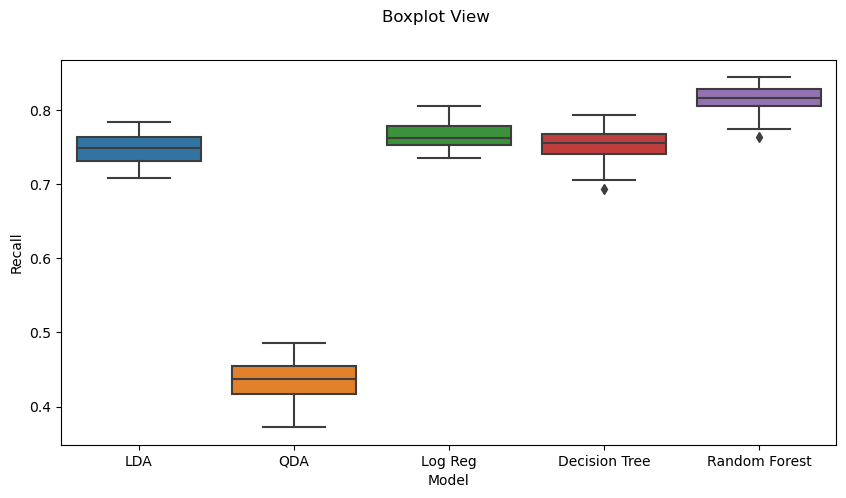

In [44]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LDA',pipe_lda))
models.append(('QDA',pipe_qda))
models.append(('Log Reg',pipe_logreg))
models.append(('Decision Tree',pipe_dt))
models.append(('Random Forest',pipe_rdf))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train_smt,y_train_smt,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n') 

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

Firstly, we evaluated 'Recall' because it is the hardest metric to optimize. The plot shows the recall scores for each models and the variability around these scores. These scores suggest that Random Forest and Logistic Regression models perform better in identifying positive cases (higher recall), while QDA shows the lowest performance in this aspect among these models. The small variability indicates stability in the performance of these models across different data subsets or iterations.

In [45]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Validation Statistics
    target_names=['Outcome 0','Outcome 1']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred)) 

In [46]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara  
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LinearDiscriminantAnalysis()

Best Parameters: {'clf__solver': 'svd'}

 [[  0  23   4   1]
 [  1 216  63  22]
 [  0  30  75  27]
 [  0  11  40 250]]

               precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00        28
       Major       0.77      0.72      0.74       302
       Minor       0.41      0.57      0.48       132
        None       0.83      0.83      0.83       301

    accuracy                           0.71       763
   macro avg       0.50      0.53      0.51       763
weighted avg       0.71      0.71      0.70       763


Optimized Model

Model Name: QuadraticDiscriminantAnalysis()

Best Parameters: {}

 [[ 18   3   7   0]
 [168  21  95  18]
 [ 54   1  64  13]
 [ 17   3 163 118]]

               precision    recall  f1-score   support

       Fatal       0.07      0.64      0.13        28
       Major       0.75      0.07      0.13       302
       Minor       0.19      0.48      0.28       132
   

In [47]:
#Define x and y variable
x = df_ohe.drop(['Injury Severity'],axis=1).to_numpy()
y = df_ohe['Injury Severity'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
uni_model_DFINAL =  LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100)

uni_model_DFINAL.fit(x_train, y_train)

y_pred_DFinal = uni_model_DFINAL.predict(x_test)

accuracy_DFINAL = accuracy_score(y_test,y_pred_DFinal)

uni_model_DFINAL = confusion_matrix(y_test,y_pred_DFinal)

In [48]:
 import pickle

with open('Universal_model.pickle', 'wb') as f:
     pickle.dump(uni_model_DFINAL, f)

In [56]:
df['Vehicle Type'].unique()

array(['Other', 'Bicycle', 'Automobile, Station Wagon', 'Motorcycle',
       'Open Body Truck', 'Pick Up Truck', 'Taxi', 'Moped',
       'Municipal Transit Bus (TTC)', 'Passenger Van', 'Delivery Van',
       'Truck-Tractor', 'Construction Equipment', 'Closed Body Truck'],
      dtype=object)